In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

travel_hpi = pd.read_csv('Resources/2010 to 2019 HPI and Travel Time to Work.csv')
hpi = pd.read_csv('Resources/2010 to 2019 HPI Change.csv')
travel = pd.read_csv('Resources/2010 to 2019 Travel Time to Work Change.csv')
travel_cs = pd.read_csv('Resources/2010 to 2019 Travel County and State to Change.csv')

In [2]:
travel_hpi.head()

,Year,State,Total Estimate,Estimate Less than 5 min,Estimate 5 to 9 min,Estimate 10 to 14 min,Estimate 15 to 19 min,Estimate 20 to 24 min,Estimate 25 to 29 min,Estimate 30 to 34 min,...,% Travel 30 to 34 min,% Travel 35 to 39 min,% Travel 40 to 44 min,% Travel 45 to 59 min,% Travel 60 to 89 min,% Travel More than 90 min,% Working in County of Residence,% Working Outside County of Residence,% Working in State of Residence,% Working Outside State of Residence
0,2010,AL,1895987,59051,189676,274724,330572,301885,117283,264594,...,0.139555,0.028287,0.029620,0.071576,0.040230,0.019213,0.568210,0.360792,0.929003,0.070997
1,2010,AK,324619,30199,56593,58333,59252,44082,16062,24726,...,0.076169,0.016170,0.012430,0.037672,0.025242,0.017451,0.815196,0.179669,0.994864,0.005135
2,2010,AZ,2470950,66596,243712,346279,385741,376165,166696,390622,...,0.158086,0.028750,0.042460,0.072769,0.040357,0.016048,0.888187,0.085778,0.973965,0.026035
3,2010,AR,1189709,60584,171728,203607,207225,163084,73975,136006,...,0.114319,0.025547,0.023542,0.050491,0.029665,0.016589,0.567898,0.366222,0.934120,0.065880
4,2010,CA,15097170,346580,1331209,2102009,2350056,2255417,851250,2224075,...,0.147317,0.025530,0.039092,0.078736,0.067547,0.029972,0.703514,0.289409,0.992924,0.007076


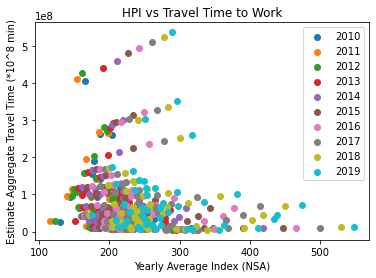

In [3]:
# Travel Time and NSA Index
years = travel_hpi.groupby('Year')
for name, group in years:
    plt.scatter(group['Yearly Average Index (NSA)'], group['Estimate Aggregate Travel Time (min)'], label=name)
plt.xlabel('Yearly Average Index (NSA)')
plt.ylabel('Estimate Aggregate Travel Time (*10^8 min)')
plt.title('HPI vs Travel Time to Work')
plt.legend()

plt.savefig('Images/HPI Travel Time to Work.png')
plt.show()


In [ ]:
# Merging hpi and travel time changes dataframes
changes_df = pd.merge(hpi, travel, on='State', how='left')

# % Change NSA vs. % Change Total Travel Time
state = changes_df.groupby('State')
for name, group in state:
    plt.scatter(group['% Change in NSA Index'], group['% Change Total'], label=name)
plt.annotate('NV', (110.02, 21.88))
plt.xlabel('% Change in HPI')
plt.ylabel('% Change Total Travel Time')
plt.title('% Change in HPI vs % Change Total Travel Time')
plt.legend(loc='lower right', bbox_to_anchor=(0.95, 0.03), fontsize=6, ncol=4)


plt.savefig('Images/Change HPI Total Travel Time.png')
plt.show()

correlation1 = st.pearsonr(hpi['% Change in NSA Index'], travel['% Change Total'])
print(f"The correlation between % Change in NSA Index and % Change in Total Travel Time is {round(correlation1[0],2)}")

In [ ]:
# Calculating correlation coefficients
correlation1 = st.pearsonr(hpi['% Change in NSA Index'], travel['% Change Total'])
correlation2 = st.pearsonr(hpi['% Change in NSA Index'], travel_cs['% Change Working in County of Residence'])
correlation4 = st.pearsonr(hpi['% Change in NSA Index'], travel_cs['% Change Working in State of Residence'])
correlation5 = st.pearsonr(hpi['% Change in NSA Index'], travel_cs['% Change Working Outside State of Residence'])

print(f"The correlation between % Change in NSA Index and % Change in Total Travel Time is {round(correlation1[0],2)}")
print(f"The correlation between % Change in NSA Index and % Change Working in County of Residence is {round(correlation2[0],2)}")
print(f"The correlation between % Change in NSA Index and % Change Working in State of Residence is {round(correlation4[0],2)}")
print(f"The correlation between % Change in NSA Index and % Change Working Outside State of Residence is {round(correlation5[0],2)}")

In [ ]:
# NSA Index and Aggregate Travel Time over time
yearhpi = travel_hpi[['Year', 'Yearly Average Index (NSA)']]
yeartravel = travel_hpi[['Year', 'Estimate Aggregate Travel Time (min)']]

year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
mean_nsa = yearhpi.groupby('Year').mean('Yearly Average Index (NSA)')['Yearly Average Index (NSA)']
mean_aggregate = yeartravel.groupby('Year').mean('Estimate Aggregate Travel Time (min)')['Estimate Aggregate Travel Time (min)']

fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
a1.plot(year, mean_nsa, label='NSA Index', color='r')
a1.set_ylabel('NSA Index')
a2 = a1.twinx()
a2.plot(year, mean_aggregate, label='Estimate Aggregate Travel Time', color='b')
a2.set_ylabel('Estimate Aggregate Travel Time (min)')
fig.legend(loc='upper left', bbox_to_anchor=(0.55, 1.2))
fig.suptitle('Mean NSA and Aggregate Travel Time (2010-2019)')

plt.savefig('Images/Mean NSA Aggregate Travel Time.png', bbox_inches='tight')
plt.show()

In [ ]:
# SA Index and Aggregate Travel Time over time
yearhpi = travel_hpi[['Year', 'Yearly Average Index (SA)']]
yeartravel = travel_hpi[['Year', 'Estimate Aggregate Travel Time (min)']]

year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
mean_sa = yearhpi.groupby('Year').mean('Yearly Average Index (SA)')['Yearly Average Index (SA)']
mean_aggregate = yeartravel.groupby('Year').mean('Estimate Aggregate Travel Time (min)')['Estimate Aggregate Travel Time (min)']

fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
a1.plot(year, mean_sa, label='SA Index', color='r')
a1.set_ylabel('SA Index')
a2 = a1.twinx()
a2.plot(year, mean_aggregate, label='Estimate Aggregate Travel Time', color='b')
a2.set_ylabel('Estimate Aggregate Travel Time (min)')
fig.legend(loc='upper left', bbox_to_anchor=(0.55, 1.2))
fig.suptitle('Mean SA and Aggregate Travel Time (2010-2019)')

plt.savefig('Images/Mean SA Aggregate Travel Time.png', bbox_inches='tight')
plt.show()

In [ ]:
yeartravelhpi = travel_hpi[['Year','Estimate Aggregate Travel Time (min)','Yearly Average Index (NSA)']]
yeartravelhpi_group = yeartravelhpi.groupby('Year').mean(['Estiamte Aggregate Travel Time (min)','Yearly Average Index (NSA)']) 
x = yeartravelhpi_group.index.tolist()
y =yeartravelhpi_group['Yearly Average Index (NSA)'].tolist()
yeartravelhpi_group.plot.bar(y ='Estimate Aggregate Travel Time (min)')
plt.ylabel('Estimate Aggregate Travel Time (10^7 min)')
plt.title("Estimate Aggregate Travel Time (2010-2019)")

plt.savefig('Images/Aggregate Travel Time 2010 to 2019.png')
plt.show()

In [ ]:
# % share of workers travel time from 2010 to 2019

time_groups = travel_hpi
time_groups['% Travel Less than 20 min'] = (travel_hpi['Estimate Less than 5 min']+ travel_hpi['Estimate 5 to 9 min']\
                                            +travel_hpi['Estimate 10 to 14 min']+travel_hpi['Estimate 15 to 19 min'])/travel_hpi['Total Estimate']
time_groups['% Travel 20 to 39 min'] = (travel_hpi['Estimate 20 to 24 min']+travel_hpi['Estimate 25 to 29 min']\
                                        +travel_hpi['Estimate 30 to 34 min']+ travel_hpi['Estimate 35 to 39 min'])/travel_hpi['Total Estimate']
time_groups['% Travel 40 to 59 min'] = (travel_hpi['Estimate 40 to 44 min']+travel_hpi['Estimate 45 to 59 min'])/travel_hpi['Total Estimate']
time_groups['% Travel 60 to 89 min'] = (travel_hpi['Estimate 60 to 89 min']+travel_hpi['Estimate 45 to 59 min'])/travel_hpi['Total Estimate']
time_groups['% Travel More than 90 min'] = travel_hpi['Estimate 90 or more min']/travel_hpi['Total Estimate'] 


mean_less20 = time_groups.groupby('Year').mean('% Travel Less than 20 min')['% Travel Less than 20 min']
mean_20to39 = time_groups.groupby('Year').mean('% Travel 20 to 39 min')['% Travel 20 to 39 min']
mean_40to59 = time_groups.groupby('Year').mean('% Travel 40 to 59 min')['% Travel 40 to 59 min']
mean_60to89 = time_groups.groupby('Year').mean('% Travel 60 to 89 min')['% Travel 60 to 89 min']
mean_more90 = time_groups.groupby('Year').mean('% Travel More than 90 min')['% Travel More than 90 min']

fig, ax = plt.subplots()
ax.set_title("Change of US Workers' Commute Times from 2010 to 2019", fontsize=18)

ax.set_ylabel('% of Total Workers Traveling',fontsize=16)
ax.set_xlabel('Year', fontsize=16)
plt.xticks(x)
plt.grid()
plt.yticks()


plt.plot(year,mean_less20, label="% Less than 20 min")
plt.plot(year,mean_20to39, label="% 20 to 39 min")
plt.plot(year,mean_40to59, label="% 40 to 59 min")
plt.plot(year,mean_60to89, label="% 60 to 89 min")
plt.plot(year,mean_more90, label="% More than 90 min")
plt.rcParams["figure.figsize"] = (15,10)

fig.legend(loc='upper left', bbox_to_anchor=(0.8, 1))
plt.xlim([2010, 2019])
plt.ylim([0, 0.5])

plt.savefig('Images/Change Commute Times.png', bbox_inches='tight')
plt.show()


In [ ]:
# % share of workers travel time from 2010 to 2019

cs_groups = travel_hpi


cs_groups['% Working in County of Residence'] = travel_hpi['Worked in County of Residence Estimate Aggregate (min)']/travel_hpi['Estimate Aggregate Travel Time (min)']
cs_groups['% Working Outside County of Residence'] = travel_hpi['Worked Outside County of Residence Estimate Aggregate (min)']/travel_hpi['Estimate Aggregate Travel Time (min)']
cs_groups['% Working in State of Residence'] = travel_hpi['Worked in State of Residence Estimate Aggregate (min)']/travel_hpi['Estimate Aggregate Travel Time (min)']
cs_groups['% Working Outside State of Residence'] = travel_hpi['Worked Outside State of Residence Estimate Aggregate (min)']/travel_hpi['Estimate Aggregate Travel Time (min)']

mean_in_county = cs_groups.groupby('Year').mean('% Working in County of Residence')['% Working in County of Residence']
mean_out_county= cs_groups.groupby('Year').mean('% Working Outside County of Residence')['% Working Outside County of Residence']
mean_in_state= cs_groups.groupby('Year').mean('% Working in State of Residence')['% Working in State of Residence']
mean_out_state= cs_groups.groupby('Year').mean('% Working Outside State of Residence')['% Working Outside State of Residence']

fig, ax = plt.subplots()
ax.set_title("Change of US Workers' Work Location Relative to Residence", fontsize=18)
ax.set_ylabel('% of Total Workers', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
plt.xticks()
plt.grid()
plt.yticks()


plt.plot(year,mean_in_county, label="% Working in County of Residence")
plt.plot(year,mean_out_county, label="% Working in County Outside of Residence")
plt.plot(year,mean_out_state, label="% Working Outside State of Residence")

plt.rcParams["figure.figsize"] = (15,10)

fig.legend(loc='upper left', bbox_to_anchor=(0.65, 1))
plt.xlim([2010, 2019])
plt.ylim([0,0.6])

plt.savefig('Images/Change Time Work Location.png', bbox_inches='tight')
plt.show()